In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import pydotplus
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
# Import training and testing data
full = pd.read_csv('./data/normal/full.csv')
train = pd.read_csv('./data/normal/train.csv')
test = pd.read_csv('./data/normal/test.csv')

full_pca = pd.read_csv('./data/pca/full.csv')
train_pca = pd.read_csv('./data/pca/train.csv')
test_pca = pd.read_csv('./data/pca/test.csv')

# Drop the target column from the training data
X_train = train.drop('Result', axis=1)
Y_train = train['Result']

# Drop the target column from the testing data
X_test = test.drop('Result', axis=1)
Y_test = test['Result']

X_full = full.drop('Result', axis=1)
Y_full = full['Result']

X_full_pca = full_pca.drop('Result', axis=1)
Y_full_pca = full_pca['Result']

In [3]:
# Define function to do k-fold cross validation

def k_fold_cross_validation(k, data, labels, criterion, max_depth):
    kfold = KFold(n_splits=k, shuffle=True, random_state=7)

    k_accuracy_val = []
    recall = []
    precision = []
    f1 = []

    for fold, (train_index, val_index) in enumerate(kfold.split(data)):

        X_train_fold = data.iloc[train_index]
        Y_train_fold = labels.iloc[train_index]
        X_val_fold = data.iloc[val_index]
        Y_val_fold = labels.iloc[val_index]

        clf = DecisionTreeClassifier(random_state=7, criterion=criterion, max_depth=max_depth)
        clf.fit(X_train_fold, Y_train_fold)

        k_accuracy_val.append(clf.score(X_val_fold, Y_val_fold))

        y_pred = clf.predict(X_val_fold)

        precision.append(precision_score(Y_val_fold, y_pred, average='binary'))
        recall.append(recall_score(Y_val_fold, y_pred, average='binary'))
        f1.append(f1_score(Y_val_fold, y_pred, average='binary'))
    
    return k_accuracy_val, precision, recall, f1

def plot_heatmap(data, title):

    pivot_table = pd.pivot_table(data, values='Accuracy', index='Criterion', columns='Max Depth')

    # Plotting the heatmap using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar=True)

    plt.title(title)
    plt.show()



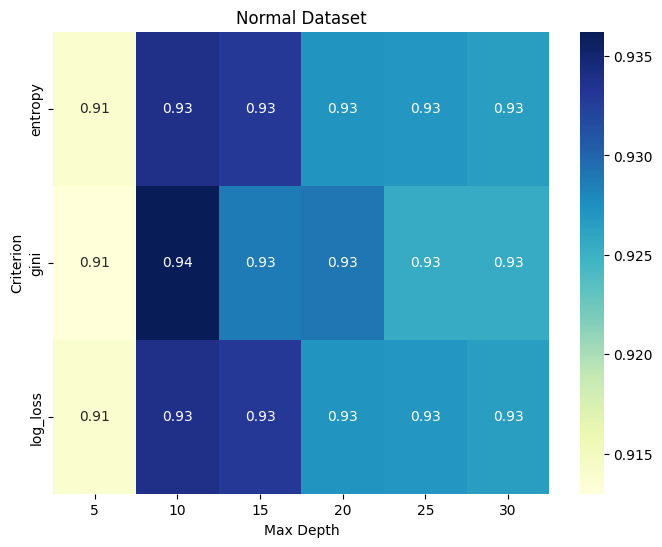

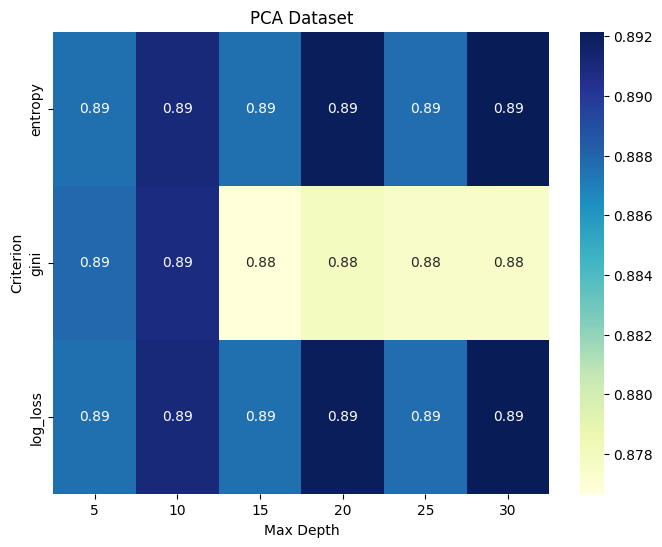

In [6]:
criterion = ['gini', 'entropy', 'log_loss']
max_depth = [5, 10, 15, 20, 25, 30]

param1 = []
param2 = []
accuracy = []

for i, cr in enumerate(criterion):
    for j, dep in enumerate(max_depth):

        test_accuracy, precision, recall, f1 = k_fold_cross_validation(5, X_full, Y_full, cr, dep)

        param1.append(cr)
        param2.append(dep)
        accuracy.append(np.mean(test_accuracy))


data = {
    'Criterion': param1,
    'Max Depth': param2,
    'Accuracy': accuracy,
}

result = pd.DataFrame(data)

plot_heatmap(result, 'Normal Dataset')

param1 = []
param2 = []
accuracy = []

for i, cr in enumerate(criterion):
    for j, dep in enumerate(max_depth):

        test_accuracy = k_fold_cross_validation(5, X_full_pca, Y_full_pca, cr, dep)

        param1.append(cr)
        param2.append(dep)
        accuracy.append(np.mean(test_accuracy))


data = {
    'Criterion': param1,
    'Max Depth': param2,
    'Accuracy': accuracy,
}

result = pd.DataFrame(data)

plot_heatmap(result, 'PCA Dataset')

In [15]:
# Training the model (Gini)
test_accuracy, precision, recall, f1 = k_fold_cross_validation(5, X_full, Y_full, 'gini', 10)

print(f"Normal Dataset Accuracy: {test_accuracy}")
print(f"Normal Dataset Precision: {precision}")
print(f"Normal Dataset Recall: {recall}")
print(f"Normal Dataset F1: {f1}")
print(f"Normal Dataset: {np.mean(test_accuracy)}")

test_accuracy, precision, recall, f1 = k_fold_cross_validation(5, X_full_pca, Y_full_pca, 'log_loss', 30)

print(f"PCA Dataset Accuracy: {test_accuracy}")
print(f"PCA Dataset Precision: {precision}")
print(f"PCA Dataset Recall: {recall}")
print(f"PCA Dataset F1: {f1}")
print(f"PCA Dataset: {np.mean(test_accuracy)}")


Normal Dataset Accuracy: [0.9324786324786325, 0.9247863247863248, 0.9444444444444444, 0.9384615384615385, 0.9409751924721984]
Normal Dataset Precision: [np.float64(0.953757225433526), np.float64(0.9045996592844975), np.float64(0.9521276595744681), np.float64(0.9333333333333333), np.float64(0.945518453427065)]
Normal Dataset Recall: [np.float64(0.9), np.float64(0.9431616341030196), np.float64(0.9339130434782609), np.float64(0.9399293286219081), np.float64(0.9340277777777778)]
Normal Dataset F1: [np.float64(0.9260991580916744), np.float64(0.9234782608695652), np.float64(0.9429323968393327), np.float64(0.9366197183098591), np.float64(0.9397379912663756)]
Normal Dataset: 0.9362292265286276
PCA Dataset Accuracy: [0.8905982905982905, 0.882051282051282, 0.8931623931623932, 0.9, 0.894781864841745]
PCA Dataset Precision: [np.float64(0.885036496350365), np.float64(0.87215411558669), np.float64(0.9017857142857143), np.float64(0.9074410163339383), np.float64(0.9037433155080213)]
PCA Dataset Recall

In [5]:
# Create pdf

clf = DecisionTreeClassifier(random_state=7, criterion='gini', max_depth=10)
clf.fit(X_train, Y_train)

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X_train.columns, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("./tree_gini.pdf")

True